In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fbprophet import Prophet
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cheques = pd.read_csv('https://raw.githubusercontent.com/SebastianHerran/Riviera42_Analysis/main/riviera42_data/cheques.csv', index_col=False)

In [4]:
direccionesdomicilio = pd.read_csv('https://raw.githubusercontent.com/SebastianHerran/Riviera42_Analysis/main/riviera42_data/direccionesdomicilio.csv', index_col=False)

In [5]:
colonias = pd.read_csv('https://raw.githubusercontent.com/SebastianHerran/Riviera42_Analysis/main/riviera42_data/colonias.csv', index_col=False)

In [6]:
clientes = pd.read_csv('https://raw.githubusercontent.com/SebastianHerran/Riviera42_Analysis/main/riviera42_data/clientes.csv', index_col=False)

In [7]:
cheques

,folio,fecha,nopersonas,cambio,descuento,idcliente,tipodeservicio,total,efectivo,tarjeta,totalalimentos,totalbebidas
0,1,2018-02-01 16:13:38.000,8,0.0,0.0,NaN,1,825.0,825.0,0.0,551.7241,159.4828
1,2,2018-02-01 19:56:38.000,1,0.0,0.0,NaN,1,85.0,85.0,0.0,51.7241,21.5517
2,3,2018-02-01 20:28:14.000,1,0.0,0.0,NaN,1,120.0,120.0,0.0,81.8966,21.5517
3,4,2018-02-01 20:33:06.000,1,0.0,0.0,NaN,1,490.0,0.0,539.0,336.2069,86.2069
4,5,2018-02-01 20:59:32.000,1,0.0,0.0,NaN,1,600.0,0.0,600.0,344.8276,172.4138
...,...,...,...,...,...,...,...,...,...,...,...,...
49733,51218,2022-03-12 20:42:15.000,1,0.0,0.0,006446,2,220.0,220.0,0.0,189.6552,0.0000
49734,51219,2022-03-12 20:46:26.000,1,0.0,0.0,001082,2,280.0,280.0,0.0,241.3793,0.0000
49735,51220,2022-03-12 20:48:10.000,1,0.0,0.0,002714,2,280.0,280.0,0.0,241.3793,0.0000
49736,51221,2022-03-12 21:00:15.000,8,0.0,0.0,NaN,1,940.0,0.0,1034.0,491.3793,318.9655


In [8]:
direcciones = direccionesdomicilio

In [9]:
pedidos = cheques.join(direcciones[['idcliente','idcolonia']].set_index('idcliente'),on='idcliente').join(colonias.set_index('idcolonia')['descripcion'],on='idcolonia',lsuffix='col')

In [10]:
'''
plt.pie(ef_y_t, shadow=True, labels =['Efectivo','Tarjeta'],autopct= lambda pct: f'{pct:.1f}%')
plt.title('Riviera 42: Ventas Efectivo vs Tarjeta')
plt.show()
'''

"\nplt.pie(ef_y_t, shadow=True, labels =['Efectivo','Tarjeta'],autopct= lambda pct: f'{pct:.1f}%')\nplt.title('Riviera 42: Ventas Efectivo vs Tarjeta')\nplt.show()\n"

In [11]:
clientes = clientes.drop('direccion',axis=1)

In [12]:
clientes = clientes.join(direcciones.set_index('idcliente'), on='idcliente')

In [13]:
domicilio = pedidos[pedidos.tipodeservicio == 2]

In [14]:
fracs_total_domicilio = domicilio[(~domicilio.descripcion.isin(['TOGO','PLAZA RIVIERA','CARR RIVIERA VERACRUZANA']))].groupby(['descripcion'])[['total']].sum()

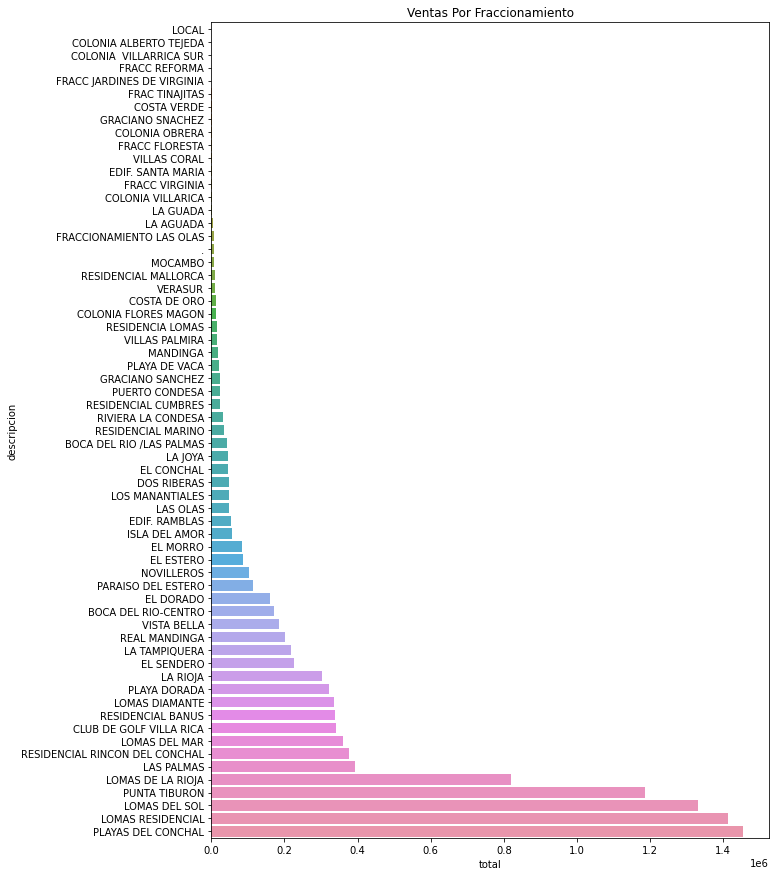

In [15]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x="total", y=fracs_total_domicilio.index, data=fracs_total_domicilio, estimator=sum, order=fracs_total_domicilio.sort_values('total', ascending=True).index)
plt.title('Ventas Por Fraccionamiento')
plt.style.use('dark_background')
plt.show()

In [16]:
pedidos.fecha = pd.to_datetime(pedidos.fecha)

In [17]:
ventas = pedidos.copy()

In [18]:
ventas_diarias = ventas.groupby('fecha').sum().resample('D').agg('sum')

In [19]:
visitas_mensuales = ventas[ventas.tipodeservicio==1].groupby('fecha').sum().resample('M').agg('sum')

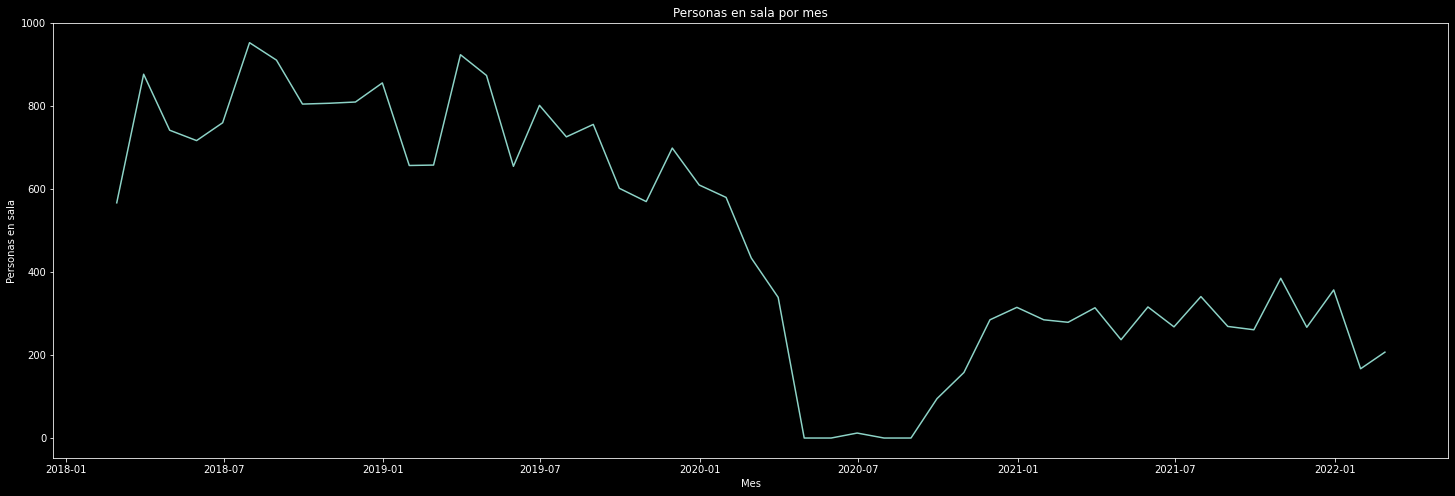

In [20]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(visitas_mensuales.index[:-1],visitas_mensuales.nopersonas[:-1])
plt.xlabel('Mes')
plt.ylabel('Personas en sala')
plt.title('Personas en sala por mes')
plt.show()

In [21]:
ventas_mensuales_promedio = ventas.groupby('fecha').mean().resample('M').agg('mean')

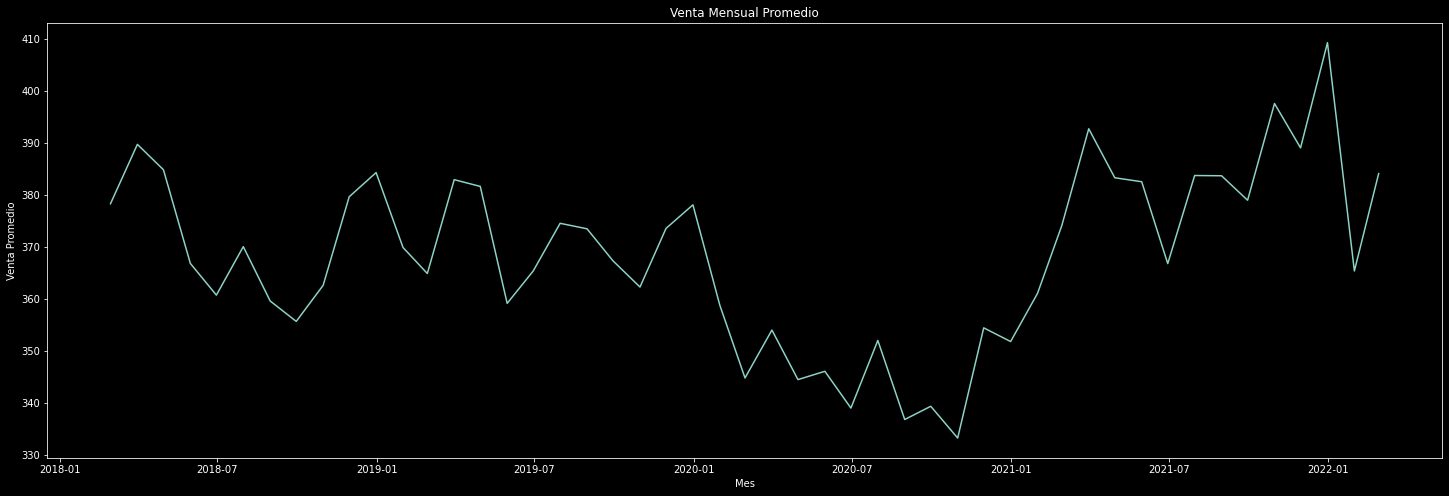

In [22]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mensuales_promedio.index[:-1],ventas_mensuales_promedio.total[:-1])
plt.xlabel('Mes')
plt.ylabel('Venta Promedio')
plt.title('Venta Mensual Promedio')
plt.show()

In [23]:
ventas_mensuales = ventas.groupby('fecha').sum().resample('M').agg('sum')

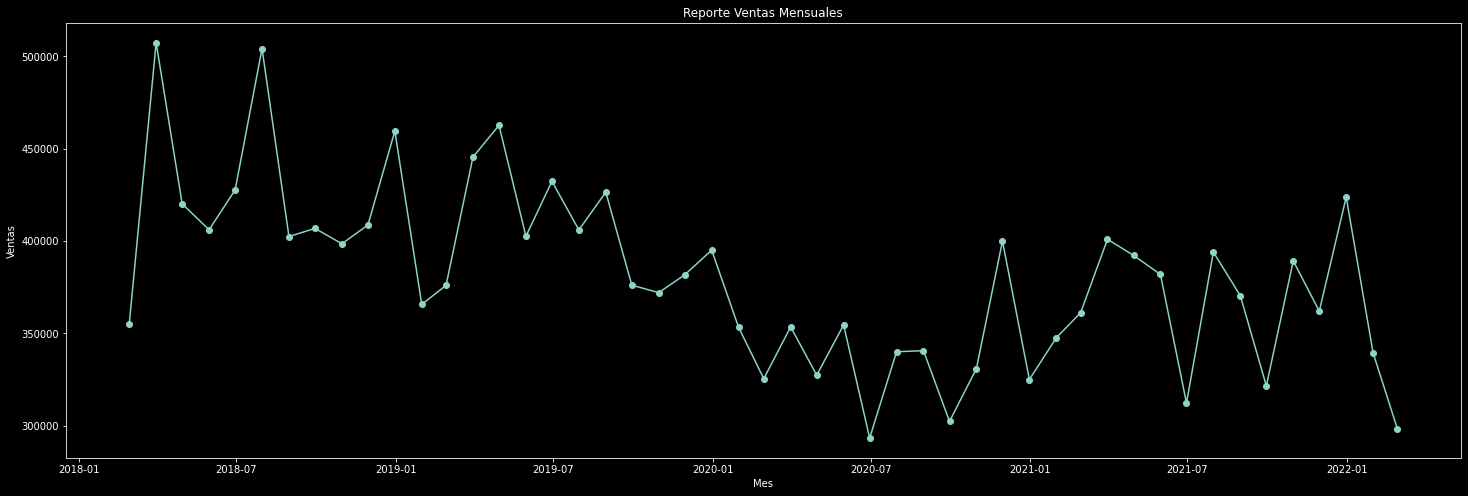

In [24]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mensuales.index[:-1],ventas_mensuales.total[:-1],marker='o')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Reporte Ventas Mensuales')
plt.show()

In [25]:
mesa = ventas[ventas.tipodeservicio==1]

In [26]:
ventas_mesa_mensuales = mesa.groupby('fecha').mean().resample('M').agg('sum')

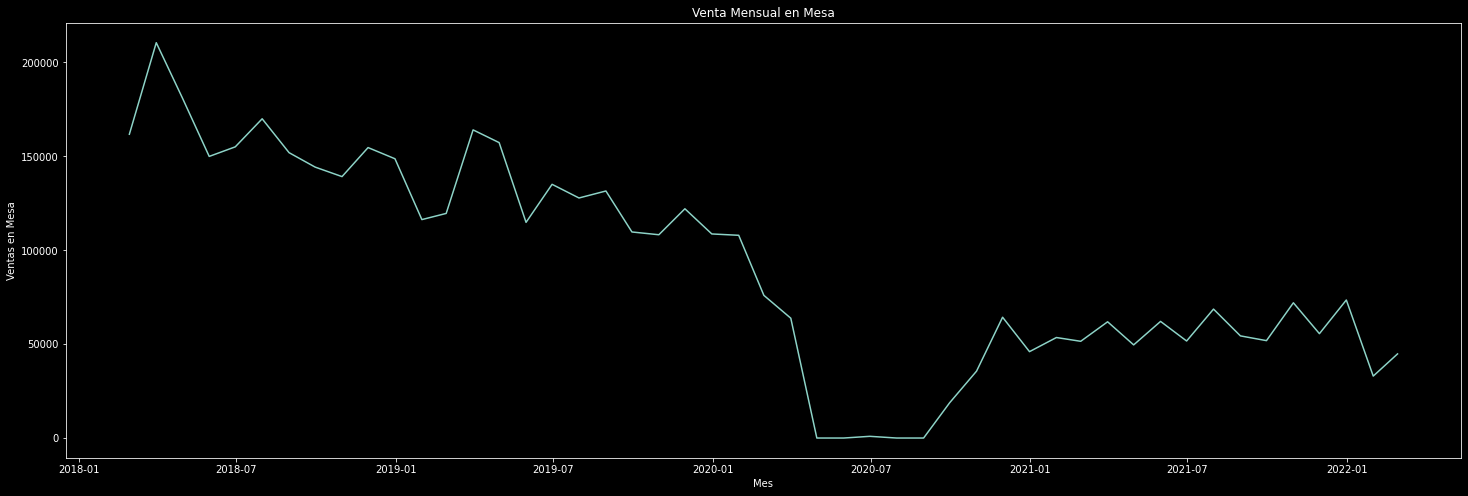

In [27]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mesa_mensuales.index[:-1],ventas_mesa_mensuales.total[:-1])
plt.xlabel('Mes')
plt.ylabel('Ventas en Mesa')
plt.title('Venta Mensual en Mesa')
plt.show()

In [28]:
ventas_mesa_semanal = mesa.groupby('fecha').mean().resample('W').agg('sum')

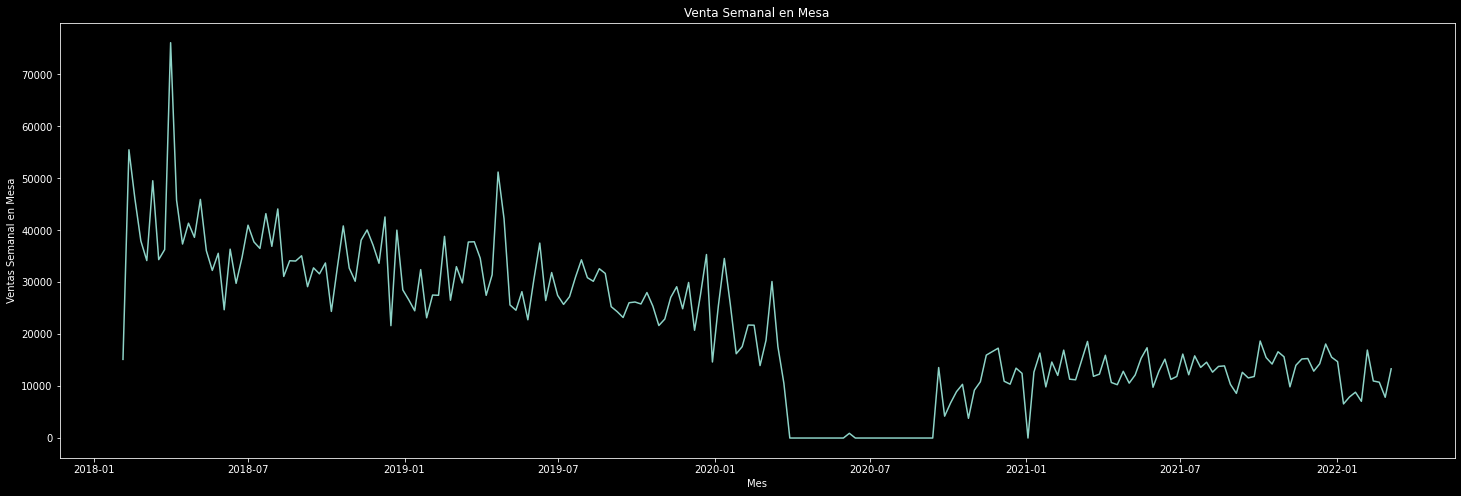

In [29]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mesa_semanal.index[:-1],ventas_mesa_semanal.total[:-1])
plt.xlabel('Mes')
plt.ylabel('Ventas Semanal en Mesa')
plt.title('Venta Semanal en Mesa')
plt.style.use('dark_background')
plt.grid(False)
plt.show()

In [30]:
ventas_mensuales_indexado = ventas_mensuales[['total']].reset_index()

In [31]:
ventas_mensuales_indexado.columns = ['ds','y']

In [32]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ventas_mensuales_indexado, shuffle=False)

In [33]:
%%time
prophet = Prophet().fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 1.05 s, sys: 149 ms, total: 1.2 s
Wall time: 1.38 s


In [34]:
prediccion = prophet.predict(test)

In [35]:
prediccion

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-31,326273.014504,321384.293584,386241.296183,326273.012669,326273.017001,27108.323869,27108.323869,27108.323869,27108.323869,27108.323869,27108.323869,0.0,0.0,0.0,353381.338373
1,2021-04-30,323195.141953,286681.703331,354632.593241,323195.134477,323195.150810,-2131.124380,-2131.124380,-2131.124380,-2131.124380,-2131.124380,-2131.124380,0.0,0.0,0.0,321064.017573
2,2021-05-31,320014.673651,293209.301757,360442.848433,320014.658584,320014.689759,6641.618391,6641.618391,6641.618391,6641.618391,6641.618391,6641.618391,0.0,0.0,0.0,326656.292042
3,2021-06-30,316936.801100,268098.136881,335062.519458,316936.777036,316936.826097,-14862.155256,-14862.155256,-14862.155256,-14862.155256,-14862.155256,-14862.155256,0.0,0.0,0.0,302074.645844
4,2021-07-31,313756.332797,310366.366149,377277.926748,313756.298821,313756.370729,30975.741058,30975.741058,30975.741058,30975.741058,30975.741058,30975.741058,0.0,0.0,0.0,344732.073855
5,2021-08-31,310575.864495,279236.652318,350336.998862,310575.817758,310575.914635,4782.899173,4782.899173,4782.899173,4782.899173,4782.899173,4782.899173,0.0,0.0,0.0,315358.763668
6,2021-09-30,307497.991944,245930.323987,317027.943612,307497.929727,307498.054417,-24816.885696,-24816.885696,-24816.885696,-24816.885696,-24816.885696,-24816.885696,0.0,0.0,0.0,282681.106248
7,2021-10-31,304317.523641,256314.080456,324544.640420,304317.446601,304317.599547,-12973.526619,-12973.526619,-12973.526619,-12973.526619,-12973.526619,-12973.526619,0.0,0.0,0.0,291343.997023
8,2021-11-30,301239.651091,296929.317986,367893.073889,301239.555881,301239.743082,30255.346659,30255.346659,30255.346659,30255.346659,30255.346659,30255.346659,0.0,0.0,0.0,331494.997749
9,2021-12-31,298059.182788,270785.021971,339152.769170,298059.070852,298059.291337,6323.163578,6323.163578,6323.163578,6323.163578,6323.163578,6323.163578,0.0,0.0,0.0,304382.346366


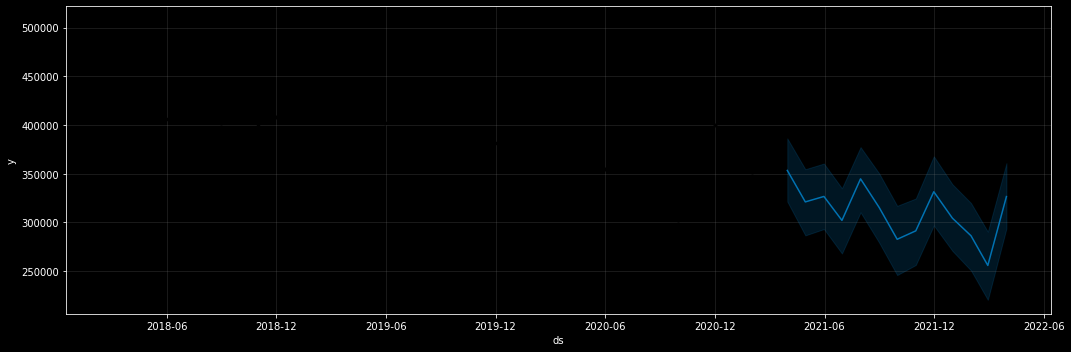

In [36]:
fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(15)
fig = prophet.plot(prediccion, ax=ax)

In [37]:
from sklearn.metrics import mean_squared_error as mse 
mse(test.y, prediccion.yhat) ** 0.5

80274.70268497443

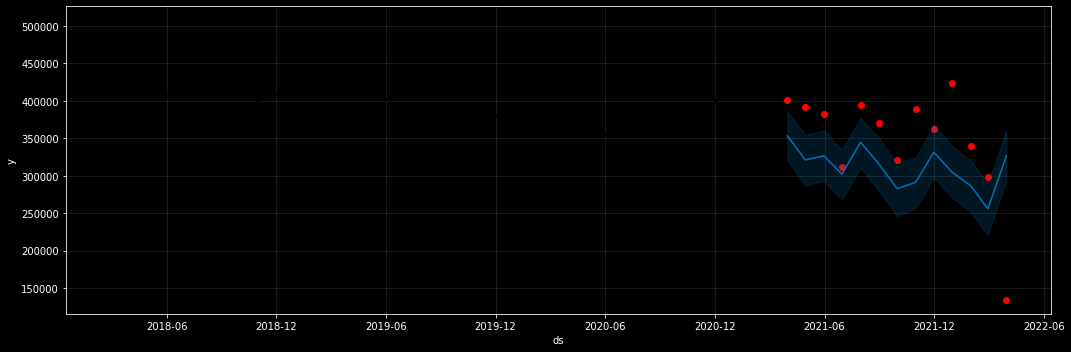

In [38]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig = prophet.plot(prediccion, ax=ax)

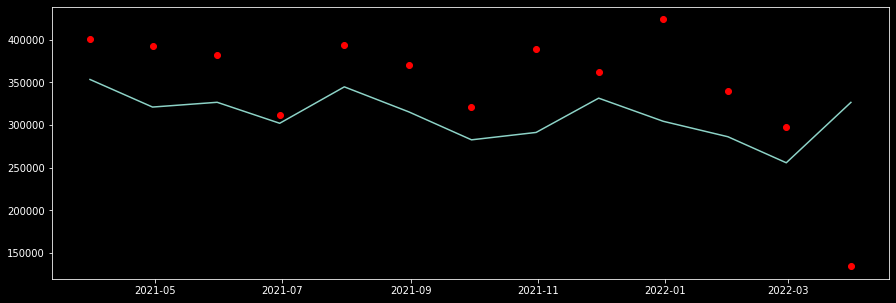

In [39]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig = plt.plot(prediccion.ds, prediccion.yhat)

Ventas Diarias Prophet

In [40]:
ventas_diarias_indexado = ventas_diarias[['total']].reset_index()
ventas_diarias_indexado.columns = ['ds','y']
train_diario, test_diario = train_test_split(ventas_diarias_indexado, shuffle=False, train_size=0.9)

In [41]:
%%time
prophet_diario= Prophet(daily_seasonality=True).fit(train_diario)
prediccion_diario = prophet_diario.predict(test_diario)

CPU times: user 1.87 s, sys: 81.2 ms, total: 1.95 s
Wall time: 1.94 s


(738076.0, 738156.0)

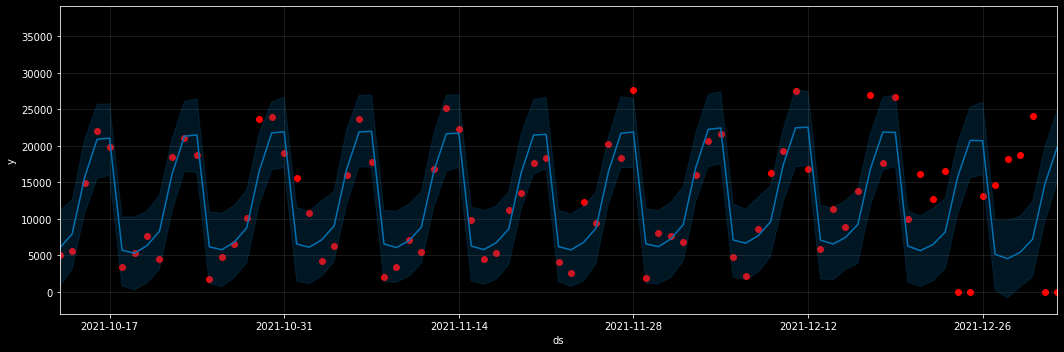

In [42]:
import datetime
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_diario.ds, test_diario.y, color='r')
fig = prophet_diario.plot(prediccion_diario, ax=ax)
ax.set_xlim([datetime.date(2021,10,13),datetime.date(2022,1,1)])

In [43]:
test_diario.y

1350     5030.0
1351     5645.0
1352    14915.0
1353    22075.0
1354    19790.0
         ...   
1496    11100.0
1497     6575.0
1498    10770.0
1499    12450.0
1500    21794.0
Name: y, Length: 151, dtype: float64

In [44]:
ventas_diarias_indexado

,ds,y
0,2018-02-01,4875.0
1,2018-02-02,3360.0
2,2018-02-03,13080.0
3,2018-02-04,14090.0
4,2018-02-05,22915.0
...,...,...
1496,2022-03-08,11100.0
1497,2022-03-09,6575.0
1498,2022-03-10,10770.0
1499,2022-03-11,12450.0


In [45]:
future = prophet_diario.make_future_dataframe(periods=100, freq='D')
forecast = prophet_diario.predict(future)

In [46]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-02-01,6758.550677,5337.943739,15011.414477,6758.550677,6758.550677,3494.590092,3494.590092,3494.590092,7545.367162,...,-3769.858214,-3769.858214,-3769.858214,-280.918856,-280.918856,-280.918856,0.0,0.0,0.0,10253.140770
1,2018-02-02,6756.641883,13097.640947,22896.620942,6756.641883,6756.641883,11183.745841,11183.745841,11183.745841,7545.367162,...,3947.806668,3947.806668,3947.806668,-309.427988,-309.427988,-309.427988,0.0,0.0,0.0,17940.387725
2,2018-02-03,6754.733090,18310.078280,28087.394861,6754.733090,6754.733090,16321.148799,16321.148799,16321.148799,7545.367162,...,9115.587923,9115.587923,9115.587923,-339.806287,-339.806287,-339.806287,0.0,0.0,0.0,23075.881888
3,2018-02-04,6752.824296,18303.112890,27894.899669,6752.824296,6752.824296,16400.751541,16400.751541,16400.751541,7545.367162,...,9226.177043,9226.177043,9226.177043,-370.792664,-370.792664,-370.792664,0.0,0.0,0.0,23153.575837
4,2018-02-05,6750.915502,2845.042889,12722.332028,6750.915502,6750.915502,955.047421,955.047421,955.047421,7545.367162,...,-6189.128454,-6189.128454,-6189.128454,-401.191287,-401.191287,-401.191287,0.0,0.0,0.0,7705.962923


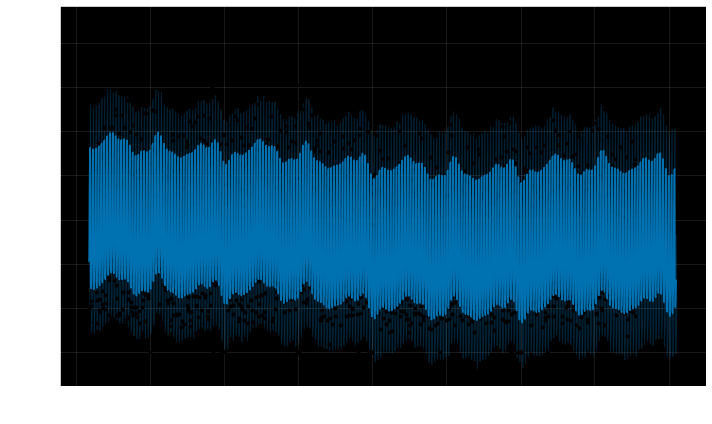

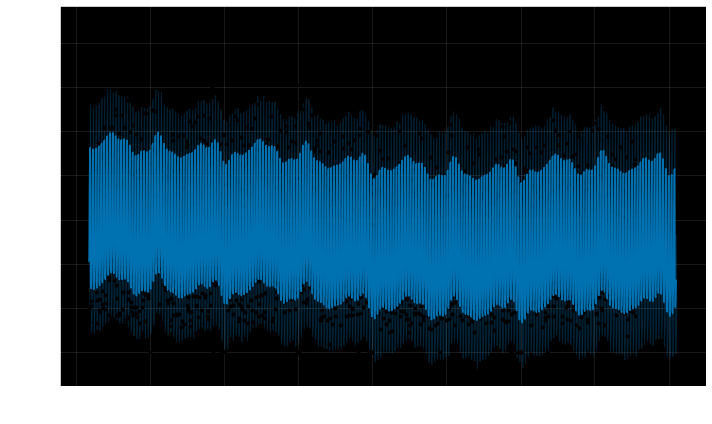

In [47]:
prophet_diario.plot(forecast)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-02-01,6758.550677,5337.943739,15011.414477,6758.550677,6758.550677,3494.590092,3494.590092,3494.590092,7545.367162,...,-3769.858214,-3769.858214,-3769.858214,-280.918856,-280.918856,-280.918856,0.0,0.0,0.0,10253.140770
1,2018-02-02,6756.641883,13097.640947,22896.620942,6756.641883,6756.641883,11183.745841,11183.745841,11183.745841,7545.367162,...,3947.806668,3947.806668,3947.806668,-309.427988,-309.427988,-309.427988,0.0,0.0,0.0,17940.387725
2,2018-02-03,6754.733090,18310.078280,28087.394861,6754.733090,6754.733090,16321.148799,16321.148799,16321.148799,7545.367162,...,9115.587923,9115.587923,9115.587923,-339.806287,-339.806287,-339.806287,0.0,0.0,0.0,23075.881888
3,2018-02-04,6752.824296,18303.112890,27894.899669,6752.824296,6752.824296,16400.751541,16400.751541,16400.751541,7545.367162,...,9226.177043,9226.177043,9226.177043,-370.792664,-370.792664,-370.792664,0.0,0.0,0.0,23153.575837
4,2018-02-05,6750.915502,2845.042889,12722.332028,6750.915502,6750.915502,955.047421,955.047421,955.047421,7545.367162,...,-6189.128454,-6189.128454,-6189.128454,-401.191287,-401.191287,-401.191287,0.0,0.0,0.0,7705.962923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2022-01-16,4799.333594,15791.828011,25303.940506,4744.039058,4845.701455,15938.110519,15938.110519,15938.110519,7545.367162,...,9226.177043,9226.177043,9226.177043,-833.433686,-833.433686,-833.433686,0.0,0.0,0.0,20737.444113
1446,2022-01-17,4801.361377,371.209107,10402.043454,4745.030781,4849.001574,619.421760,619.421760,619.421760,7545.367162,...,-6189.128454,-6189.128454,-6189.128454,-736.816947,-736.816947,-736.816947,0.0,0.0,0.0,5420.783137
1447,2022-01-18,4803.389159,-169.211907,9861.421999,4745.968896,4851.524116,247.286507,247.286507,247.286507,7545.367162,...,-6653.093438,-6653.093438,-6653.093438,-644.987217,-644.987217,-644.987217,0.0,0.0,0.0,5050.675666
1448,2022-01-19,4805.416941,1105.138445,11003.597335,4746.934571,4855.007891,1308.342383,1308.342383,1308.342383,7545.367162,...,-5677.491528,-5677.491528,-5677.491528,-559.533251,-559.533251,-559.533251,0.0,0.0,0.0,6113.759324


Venta Semanal Prophet

In [49]:
ventas_tiempo = ventas.groupby('fecha').sum()

In [50]:
ventas_semanal = ventas_tiempo.resample('W').sum()

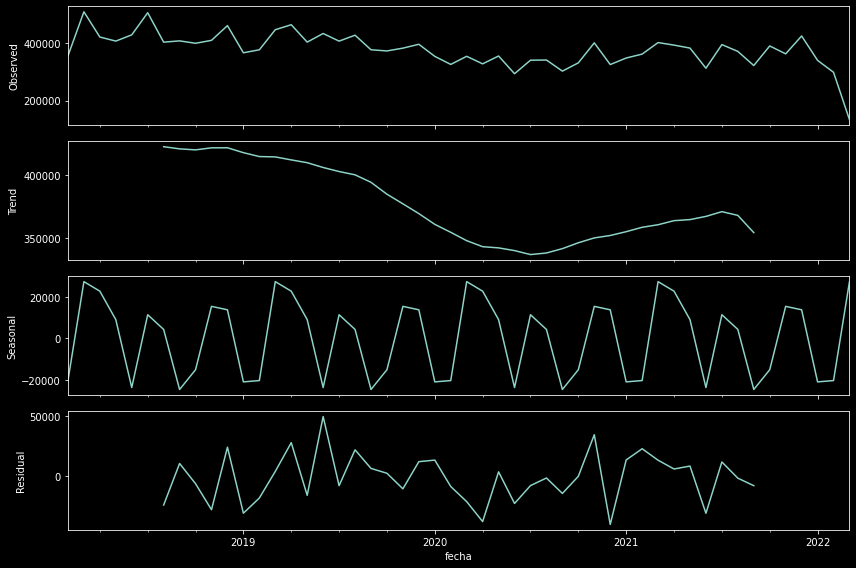

In [51]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = 12,8
decomp_add = sm.tsa.seasonal_decompose(ventas_mensuales[['total']], freq=12)
decomp_add.plot()
plt.style.use('classic')
plt.show()

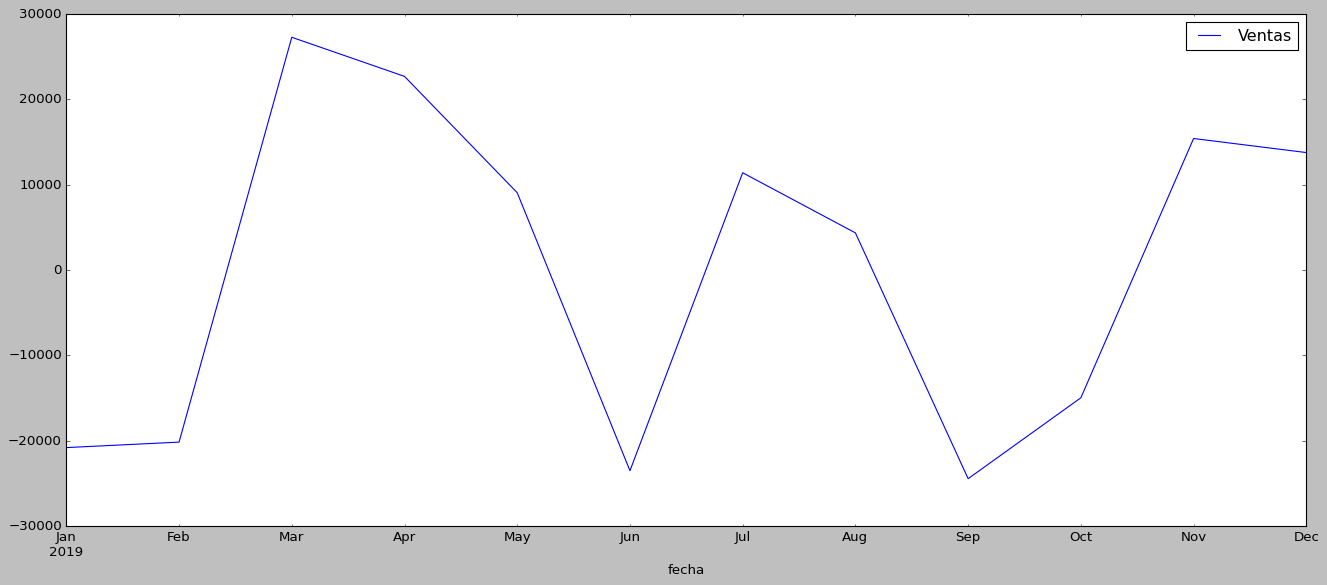

In [52]:
fig, ax = plt.subplots(figsize=(20,8))
decomp_add.seasonal.loc['2019-01-01':'2020-01-01'].plot(ax=ax)
ax.legend(['Ventas'])
plt.show()

In [53]:
decomp_add.seasonal.loc['2019-01-01':'2020-01-01']

,total
fecha,
2019-01-31,-20810.703848
2019-02-28,-20170.551071
2019-03-31,27272.073929
2019-04-30,22690.129485
2019-05-31,9054.136429
2019-06-30,-23519.995515
2019-07-31,11394.247541
2019-08-31,4347.487124
2019-09-30,-24454.205584


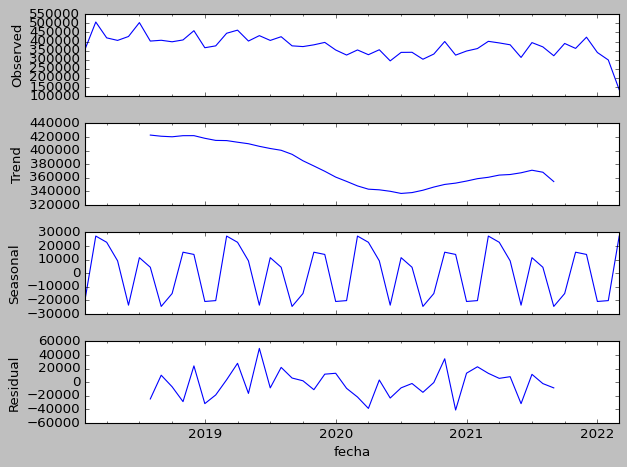

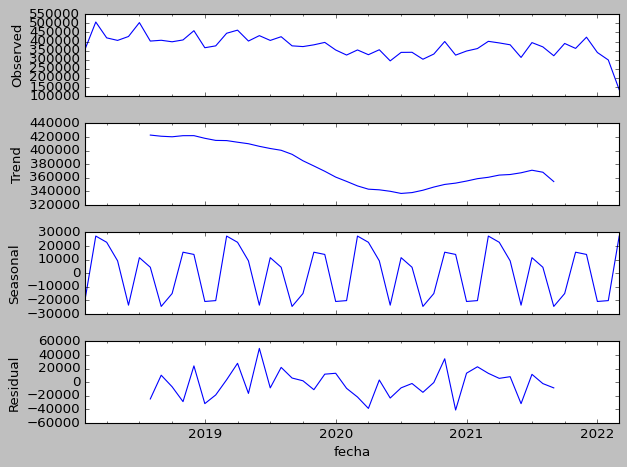

In [54]:
decomp_add.plot()

In [55]:
mesa_tiempo = mesa.groupby('fecha').sum()

In [56]:
mesa_tiempo = mesa_tiempo[['total']]

In [57]:
mesa_tiempo = mesa_tiempo.resample('M').sum()

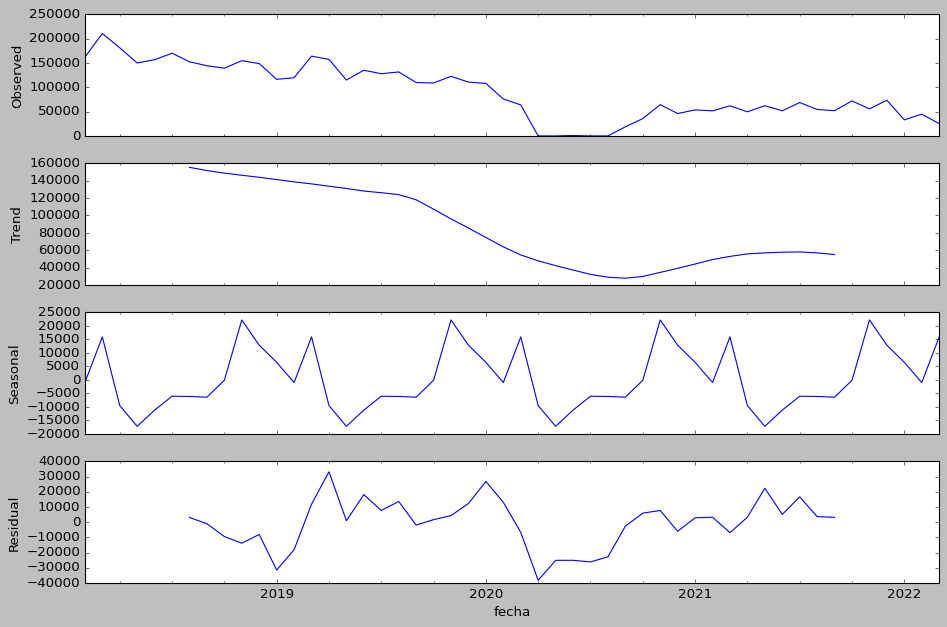

In [58]:
matplotlib.rcParams['figure.figsize'] = 12,8
decomp_add = sm.tsa.seasonal_decompose(mesa_tiempo, freq=12)
decomp_add.plot()
plt.style.use('classic')
plt.show()

In [59]:
mesa_tiempo_nocovid = mesa_tiempo[mesa_tiempo.index.year != 2020].reset_index()

In [60]:
new_dates = mesa_tiempo_nocovid.iloc[:23].fecha + pd.offsets.DateOffset(years=1)
new_dates

0    2019-02-28
1    2019-03-31
2    2019-04-30
3    2019-05-31
4    2019-06-30
5    2019-07-31
6    2019-08-31
7    2019-09-30
8    2019-10-31
9    2019-11-30
10   2019-12-31
11   2020-01-31
12   2020-02-28
13   2020-03-31
14   2020-04-30
15   2020-05-31
16   2020-06-30
17   2020-07-31
18   2020-08-31
19   2020-09-30
20   2020-10-31
21   2020-11-30
22   2020-12-31
Name: fecha, dtype: datetime64[ns]

In [61]:
mesa_tiempo_nocovid.iloc[:23].fecha = new_dates

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
mesa_tiempo_nocovid = mesa_tiempo_nocovid.set_index('fecha')

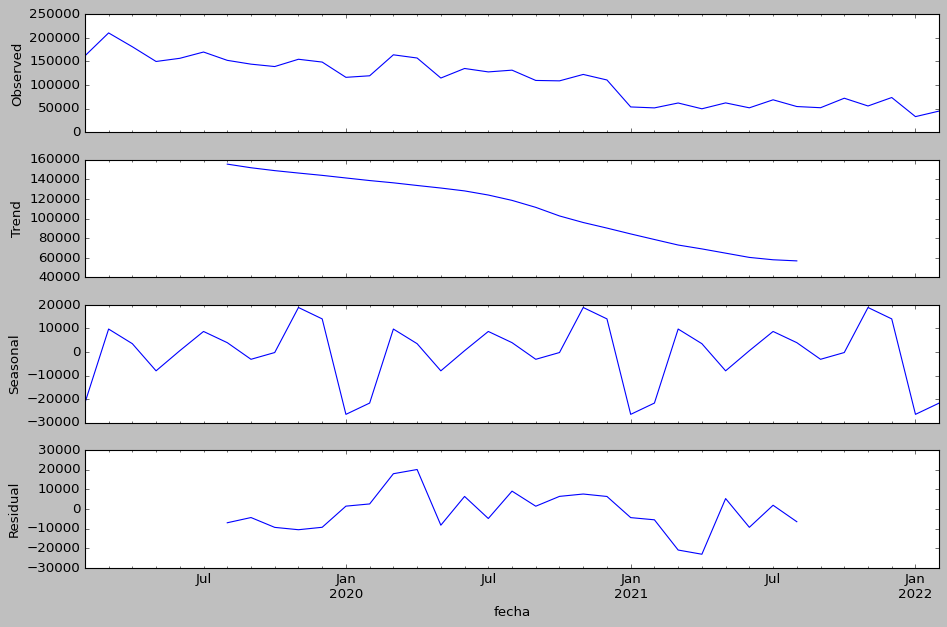

In [63]:
matplotlib.rcParams['figure.figsize'] = 12,8
decomp_add = sm.tsa.seasonal_decompose(mesa_tiempo_nocovid[:-1], freq=12)
decomp_add.plot()
plt.style.use('classic')
plt.show()

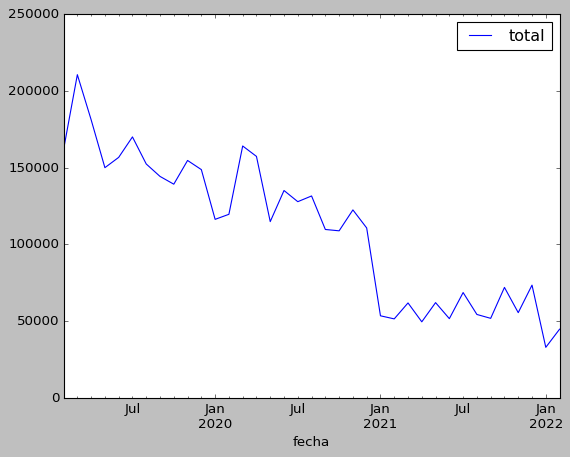

In [64]:
mesa_tiempo_nocovid[:-1].plot()

In [65]:
seasonal_year = decomp_add.seasonal['2020-01-01':'2021-01-01']

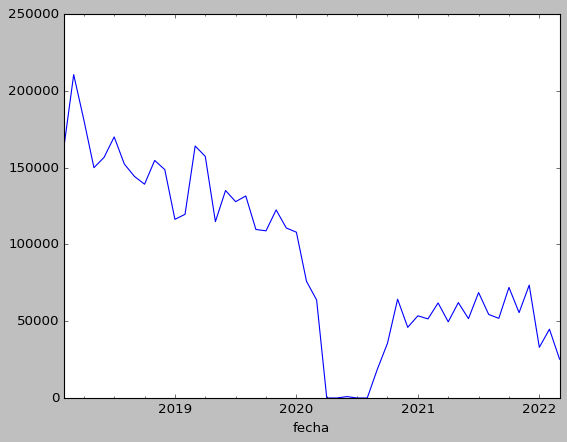

In [66]:
mesa_tiempo.total.resample('M').sum().plot()

In [67]:
mesa_mensual = mesa_tiempo.resample('M').sum()

In [68]:
mesa_mensual['x'] = np.arange(len(mesa_mensual))

In [69]:
mesa_mensual['Recta']=-5162*mesa_mensual['x'] +231682

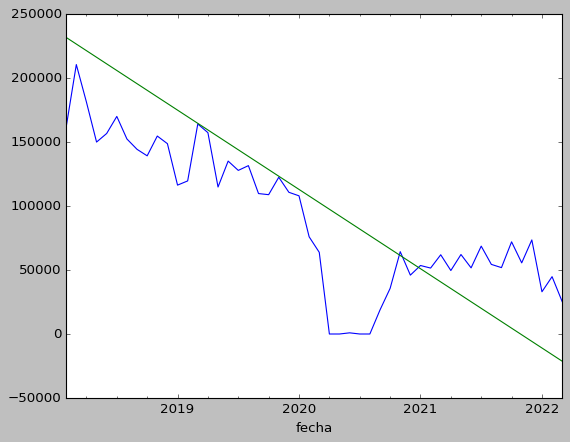

In [70]:
mesa_mensual.total.plot()
mesa_mensual.Recta.plot()

In [71]:
mesa_mensual['seasonality']=0

In [72]:
mesa_mensual.loc['2020-02-29':'2020-11-30','seasonality'] = seasonal_year[1:-1].total.values

In [73]:
mesa_mensual.loc['2020-02-29':'2020-11-30','total'] = mesa_mensual.loc['2020-02-29':'2020-11-30','Recta'] + mesa_mensual.loc['2020-02-29':'2020-11-30','seasonality']

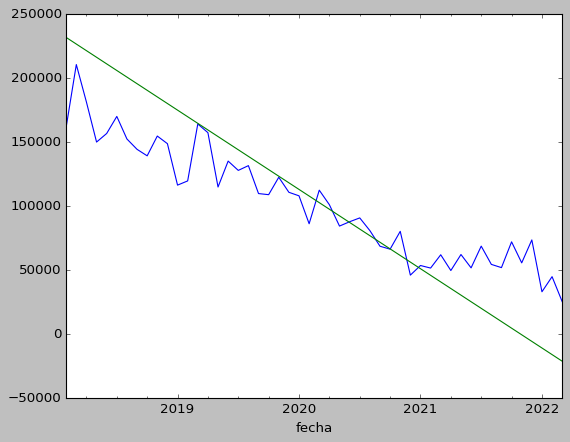

In [74]:
mesa_mensual.total.plot()
mesa_mensual.Recta.plot()

In [75]:
mesa_imputados = mesa_mensual.reset_index()[['fecha','total']]

In [76]:
mesa_imputados = mesa_imputados.rename({'fecha':'ds','total':'y'}, axis=1)

In [77]:
train, test = train_test_split(mesa_imputados, shuffle=False, train_size=0.9)

In [78]:
prophet = Prophet().fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
prediccion = prophet.predict(test)

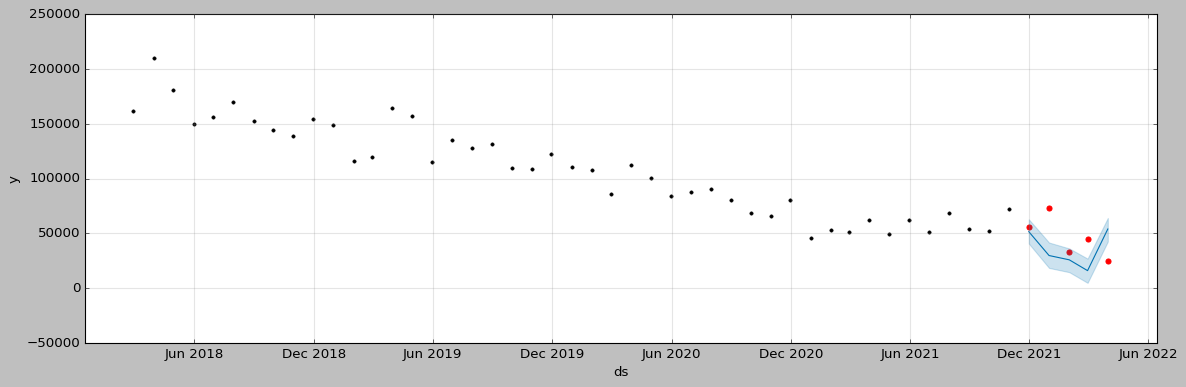

In [80]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig = prophet.plot(prediccion, ax=ax)

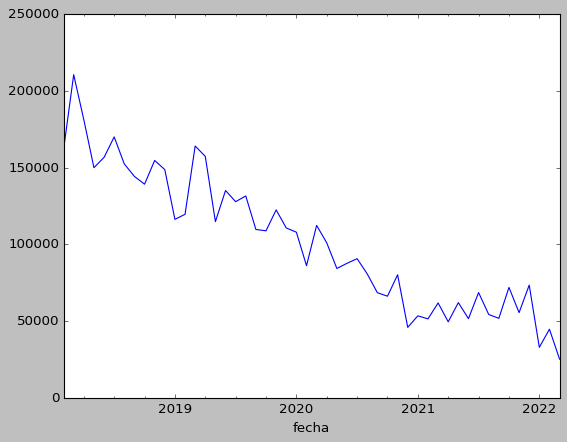

In [81]:
mesa_mensual.total.plot()

In [82]:
future = prophet.make_future_dataframe(periods=12, freq='M')
forecast = prophet.predict(future)

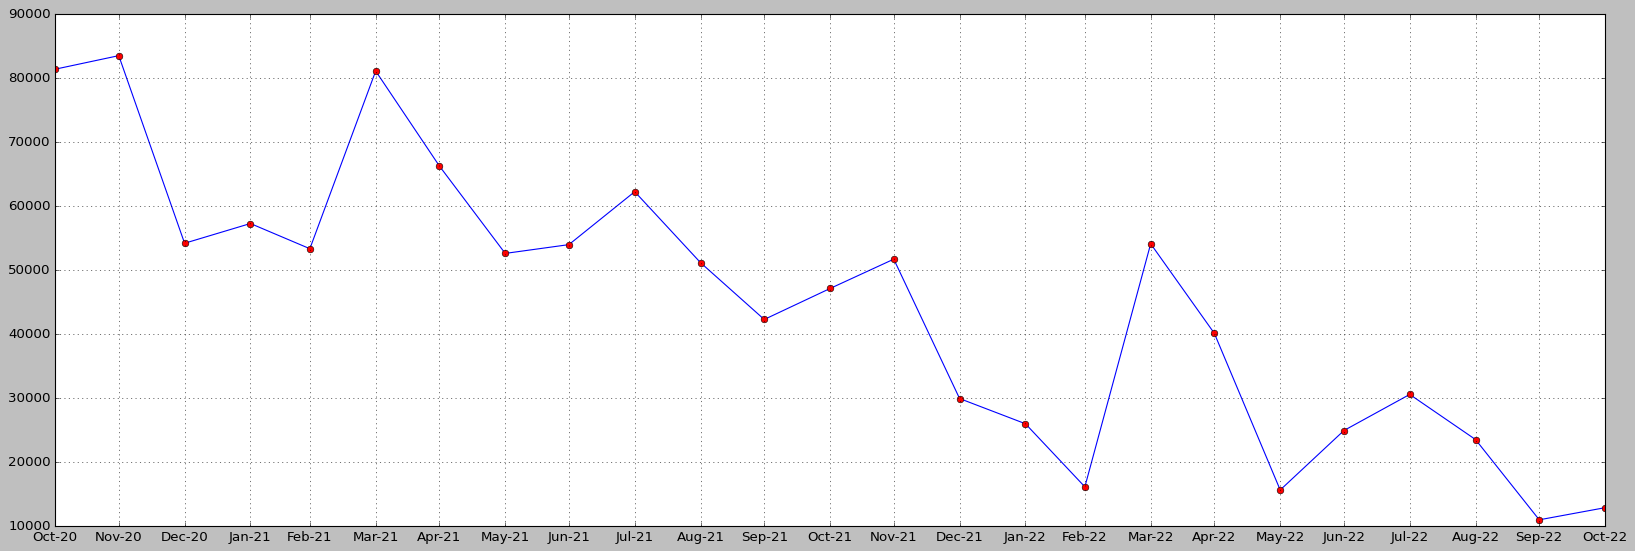

In [83]:
import matplotlib.ticker as plticker
from matplotlib.dates import DateFormatter

prediccion = prophet.predict(forecast)
#prediccion['label'] = pd.to_datetime(prediccion.ds.dt.strftime('%Y-%m'))
f, ax = plt.subplots(figsize=(25,8))
f = plt.plot(prediccion.ds[-25:], prediccion.yhat[-25:], marker='o',markerfacecolor='r')

date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(prediccion.ds[-25:])
plt.grid(True)
plt.show()

Imputated

In [84]:
mesa_imputados = mesa_mensual.reset_index()[['fecha','total']].rename({'fecha':'ds','total':'y'}, axis=1)
mesa_imputados = mesa_imputados[:-1]
mesa_imputados['cap']= 400000

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


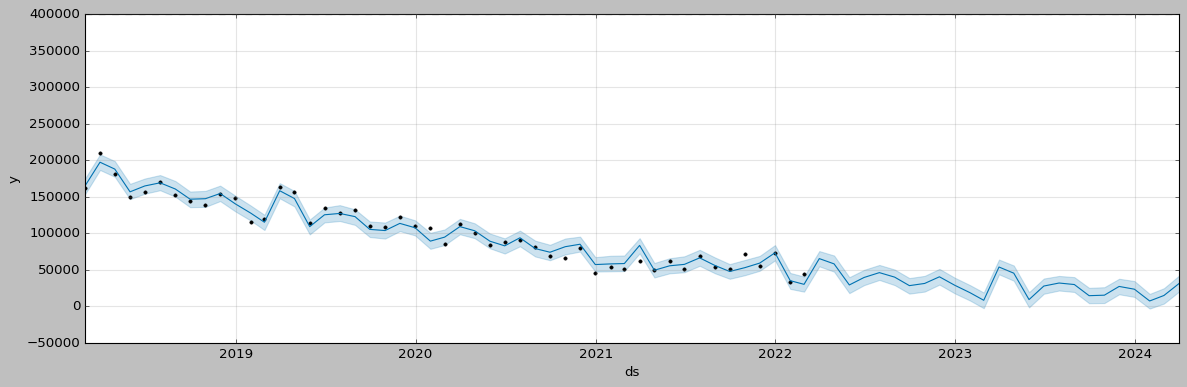

In [85]:
prophet_imp = Prophet(growth='logistic')
prophet_imp.add_country_holidays(country_name='Mexico')
prophet_imp.fit(mesa_imputados)

future = prophet_imp.make_future_dataframe(periods=25, freq='M')
future['cap']= 400000
forecast = prophet_imp.predict(future)

predicts_imp = prophet_imp.predict(future)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = prophet_imp.plot(predicts_imp, ax=ax)

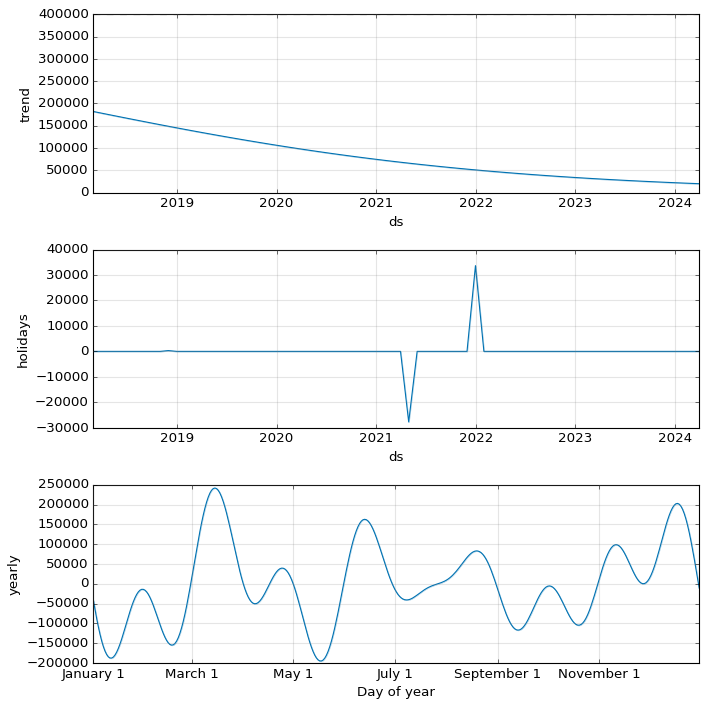

In [86]:
fig = prophet_imp.plot_components(forecast)


Normal

In [87]:
mesa_normal_proph = mesa_tiempo.reset_index()
mesa_normal_proph = mesa_normal_proph.rename({'fecha':'ds','total':'y'}, axis=1)
mesa_normal_proph = mesa_normal_proph[:-1]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


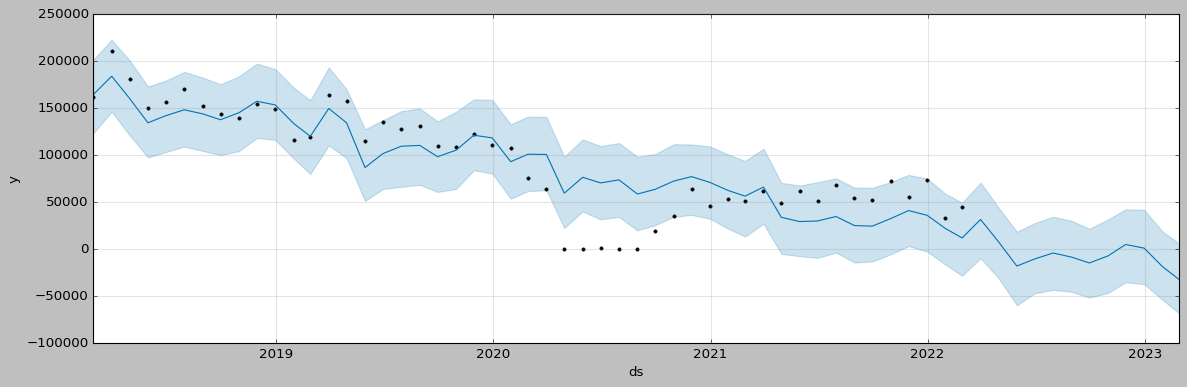

In [88]:
prophet_normal = Prophet().fit(mesa_normal_proph)

future = prophet_normal.make_future_dataframe(periods=12, freq='M')
forecast = prophet_normal.predict(future)

predicts_normal = prophet_normal.predict(future)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = prophet_normal.plot(predicts_normal, ax=ax)

Quitando Covid

In [89]:
mesa_nocovid_proph = mesa_tiempo_nocovid.reset_index()
mesa_nocovid_proph = mesa_nocovid_proph.rename({'fecha':'ds','total':'y'}, axis=1)
mesa_nocovid_proph = mesa_nocovid_proph[:-1]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


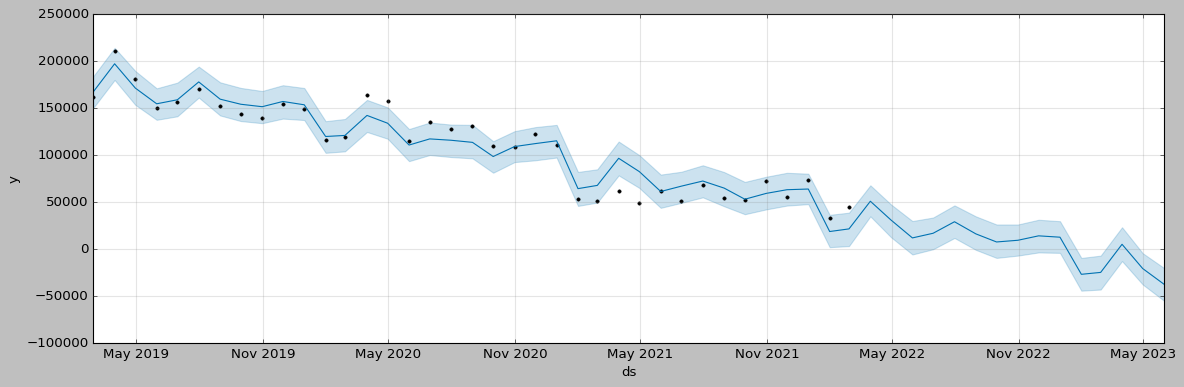

In [90]:
prophet_nocovid = Prophet().fit(mesa_nocovid_proph)

future = prophet_nocovid.make_future_dataframe(periods=15, freq='M')
forecast = prophet_nocovid.predict(future)

predicts_nocovid = prophet_nocovid.predict(future)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = prophet_nocovid.plot(predicts_nocovid, ax=ax)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


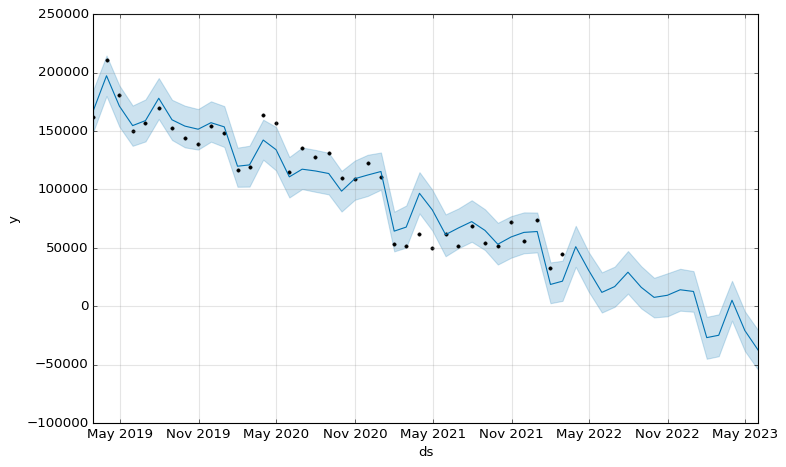

In [91]:
m = Prophet(changepoints=['2021-01-01'])
forecast = m.fit(mesa_nocovid_proph).predict(future)
fig = m.plot(forecast)

Quitando covid con NaNs

In [92]:
mesa_nan = mesa_tiempo.copy()
mesa_nan.loc['2020-03-31':'2020-10-31','total'] = np.nan
mesa_nan = mesa_nan.reset_index()
mesa_nan = mesa_nan.rename({'fecha':'ds','total':'y'}, axis=1)
mesa_nan = mesa_nan[:-1]
mesa_nan['cap']= 350000

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


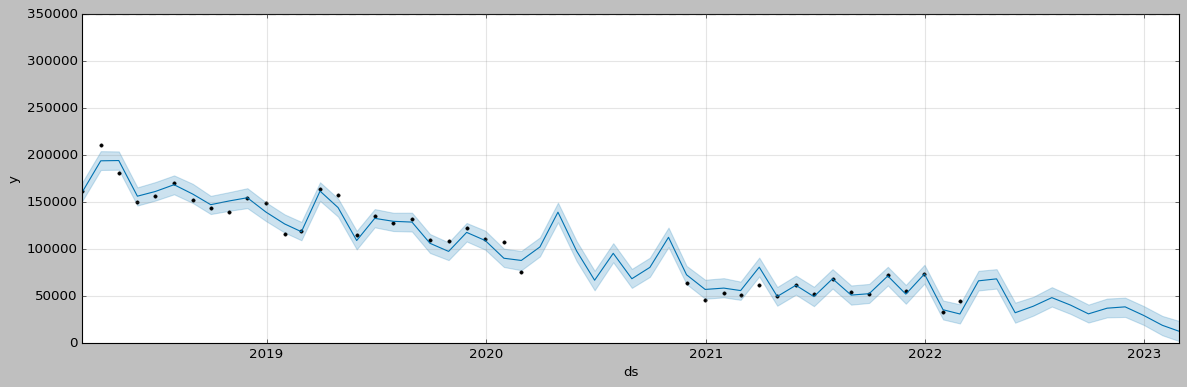

In [93]:
prophet_nan = Prophet(growth='logistic')
prophet_nan.add_country_holidays(country_name='Mexico')
prophet_nan.fit(mesa_nan)

future = prophet_nan.make_future_dataframe(periods=12, freq='M')
future['cap']= 350000
forecast = prophet_nan.predict(future)

predicts_nan = prophet_nan.predict(future)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = prophet_nan.plot(predicts_nan, ax=ax)

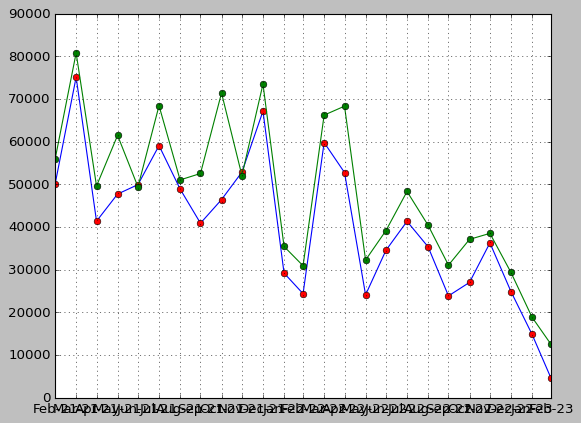

In [94]:
prediccion = prophet_imp.predict(forecast)
fig, ax = plt.subplots()
plt.plot(prediccion.ds[-25:], prediccion.yhat[-25:], marker='o',markerfacecolor='r')
plt.plot(forecast.ds[-25:], forecast.yhat[-25:], marker='o',markerfacecolor='g')
#plt.plot(forecast.ds[-25:], 35000)
matplotlib.rcParams['figure.figsize'] = 25,8
date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(prediccion.ds[-25:])
plt.grid(True)
plt.show()

In [95]:
fig = prophet_nan.predictive_samples(forecast)


In [96]:
future_nan = prophet_nan.make_future_dataframe(periods=12, freq='M')[-12:]

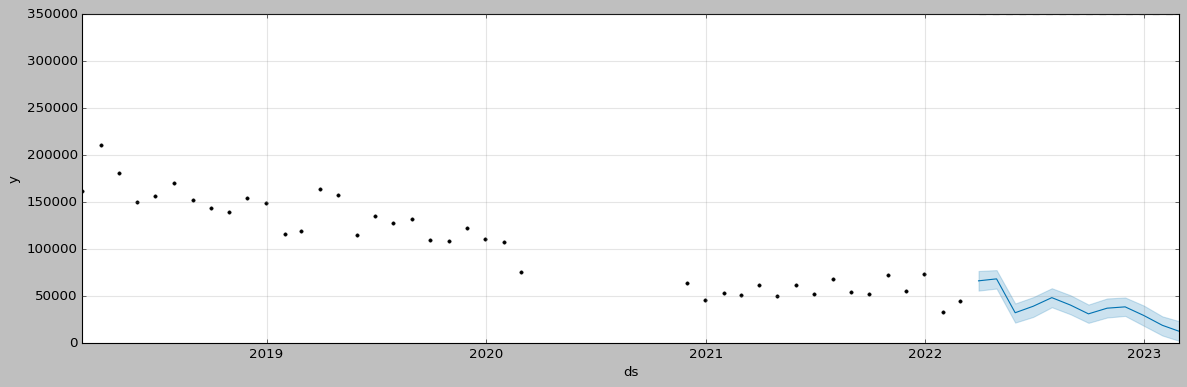

In [97]:
future_nan['cap']= 350000
forecast_nan = prophet_nan.predict(future_nan)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = prophet_nan.plot(forecast_nan, ax=ax)

In [98]:
mesa_dia = mesa[['fecha','total']].groupby('fecha').sum().resample('D').sum()

In [99]:
mesa_dia_nan = mesa_dia.copy()
mesa_dia_nan.loc['2020-03-01':'2020-10-31','total'] = np.nan
mesa_dia_nan = mesa_dia_nan.loc[:'2022-02-28']
mesa_dia_nan = mesa_dia_nan.reset_index()
mesa_dia_nan = mesa_dia_nan.rename({'fecha':'ds','total':'y'}, axis=1)
mesa_dia_nan['cap']= 20000
mesa_dia_nan['floor']= 0

In [100]:
prophet_dia = Prophet(growth='logistic',daily_seasonality=True,interval_width=.95)
prophet_dia.add_country_holidays(country_name='Mexico')
prophet_dia.fit(mesa_dia_nan)

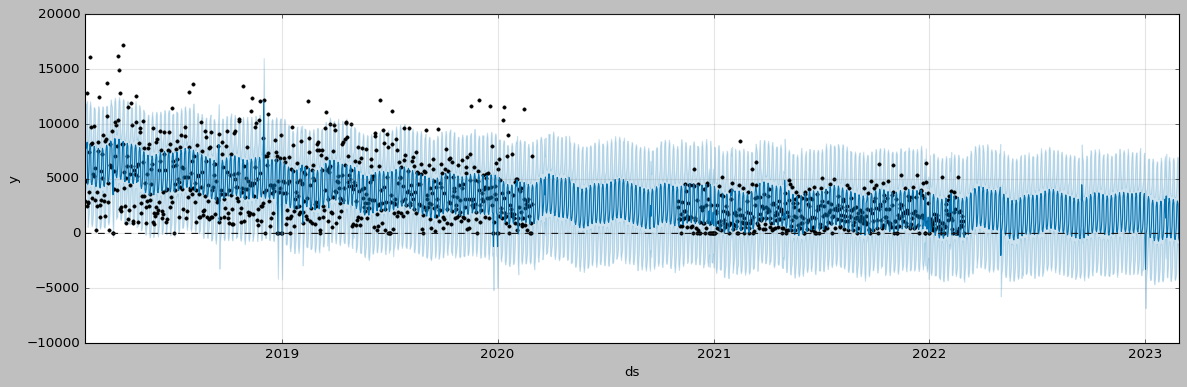

In [101]:
future_dia = prophet_dia.make_future_dataframe(periods=365, freq='D')
future_dia['cap']= 20000
future_dia['floor']= 0

predicts_dia = prophet_dia.predict(future_dia)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = prophet_dia.plot(predicts_dia, ax=ax)

In [102]:
predicts_resampled_month = predicts_dia.groupby('ds').sum().resample('M').sum().reset_index()

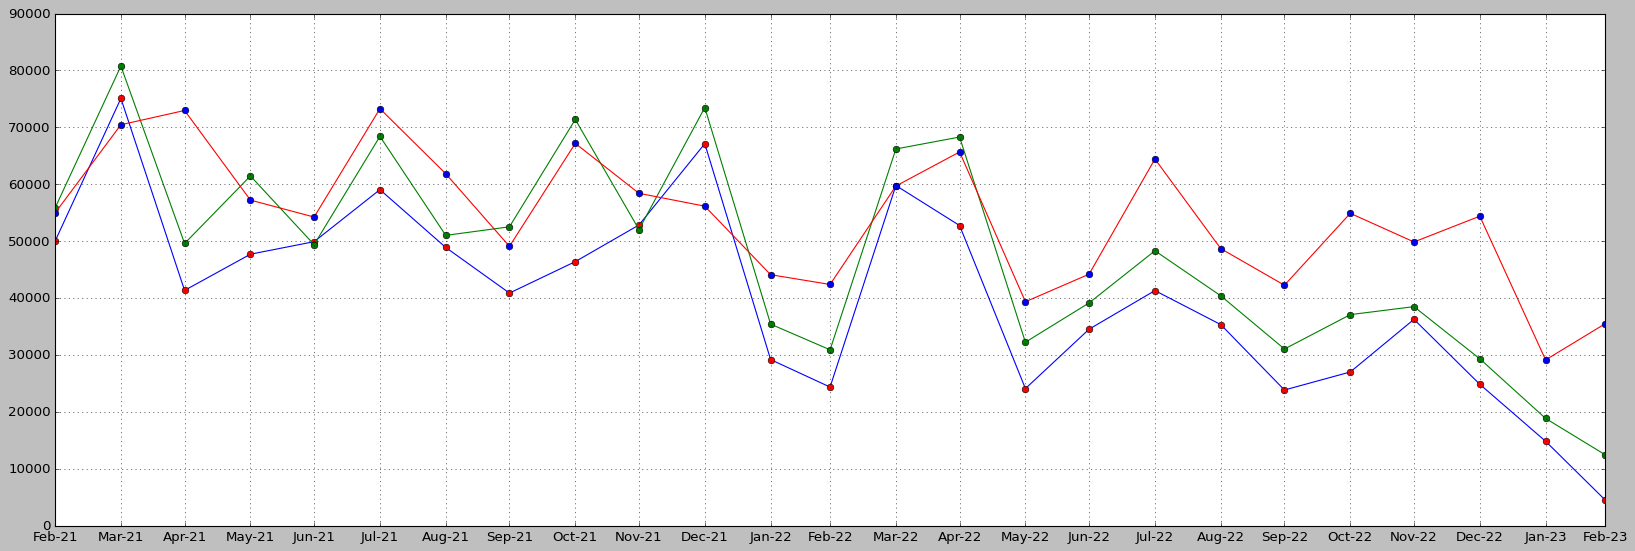

In [103]:
prediccion = prophet_imp.predict(forecast)
fig, ax = plt.subplots()
plt.plot(prediccion.ds[-25:], prediccion.yhat[-25:], marker='o',markerfacecolor='r')
plt.plot(forecast.ds[-25:], forecast.yhat[-25:], marker='o',markerfacecolor='g')
plt.plot(predicts_resampled_month.ds[-25:], predicts_resampled_month.yhat[-25:], marker='o',markerfacecolor='b')
matplotlib.rcParams['figure.figsize'] = 25,8
date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(prediccion.ds[-25:])
plt.grid(True)
plt.show()

In [104]:
predicts_resampled_month['up_dif'] = predicts_resampled_month.yhat_upper-predicts_resampled_month.yhat

In [105]:
predicts_resampled_month['low_dif'] = predicts_resampled_month.yhat_lower-predicts_resampled_month.yhat

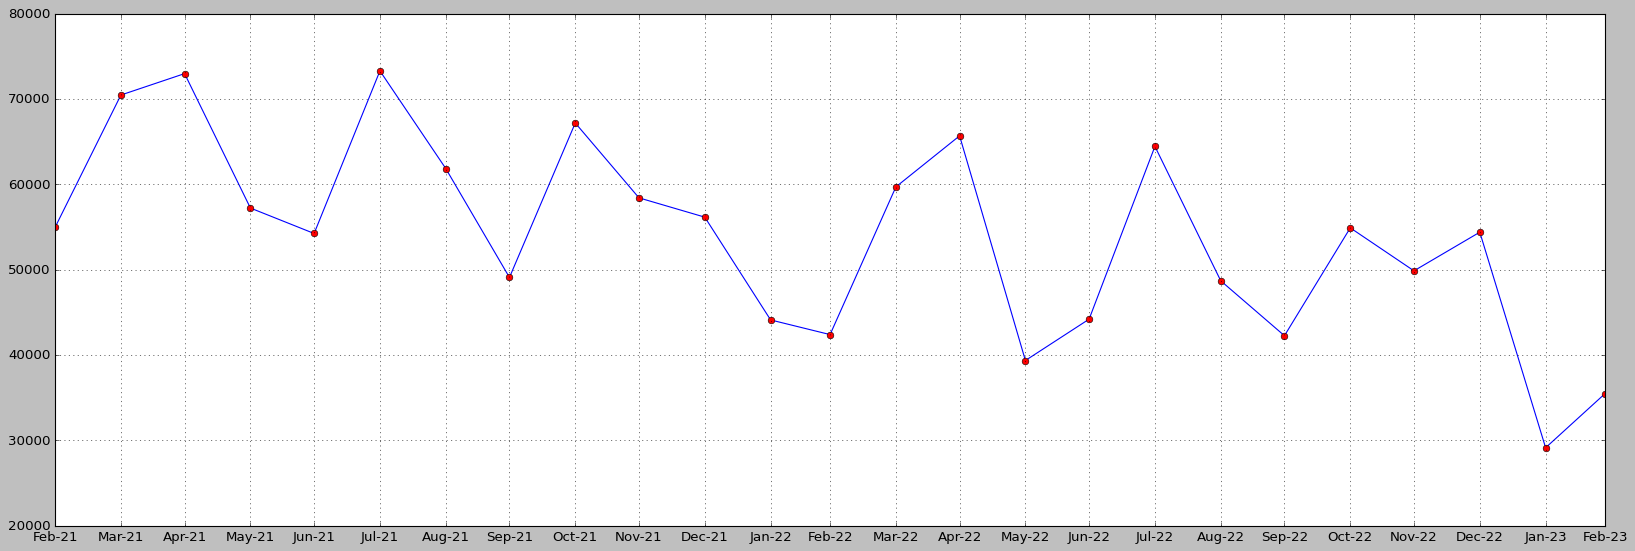

In [106]:
fig, ax = plt.subplots()
plt.plot(predicts_resampled_month.ds[-25:], predicts_resampled_month.yhat[-25:], marker='o',markerfacecolor='r')
matplotlib.rcParams['figure.figsize'] = 25,8
date_form = DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(prediccion.ds[-25:])
plt.grid(True)
plt.show()

In [107]:
predicts_resampled_month[['ds','yhat']]

,ds,yhat
0,2018-02-28,172892.757968
1,2018-03-31,201874.601041
2,2018-04-30,190655.090075
3,2018-05-31,167062.579235
4,2018-06-30,167827.715657
...,...,...
56,2022-10-31,54886.301334
57,2022-11-30,49850.590849
58,2022-12-31,54380.628490
59,2023-01-31,29118.961698


In [108]:
predicts_resampled_month.to_csv('predictions.csv')

In [109]:
predicts_resampled_month[-12:].yhat.sum()

587948.7005885572

In [110]:
ganancias = predicts_dia[-365:][['ds','yhat','yhat_upper','yhat_lower']]

In [111]:
ganancias.yhat = ganancias.yhat*.763
ganancias.yhat_upper = ganancias.yhat_upper*.763
ganancias.yhat_lower = ganancias.yhat_lower*.763

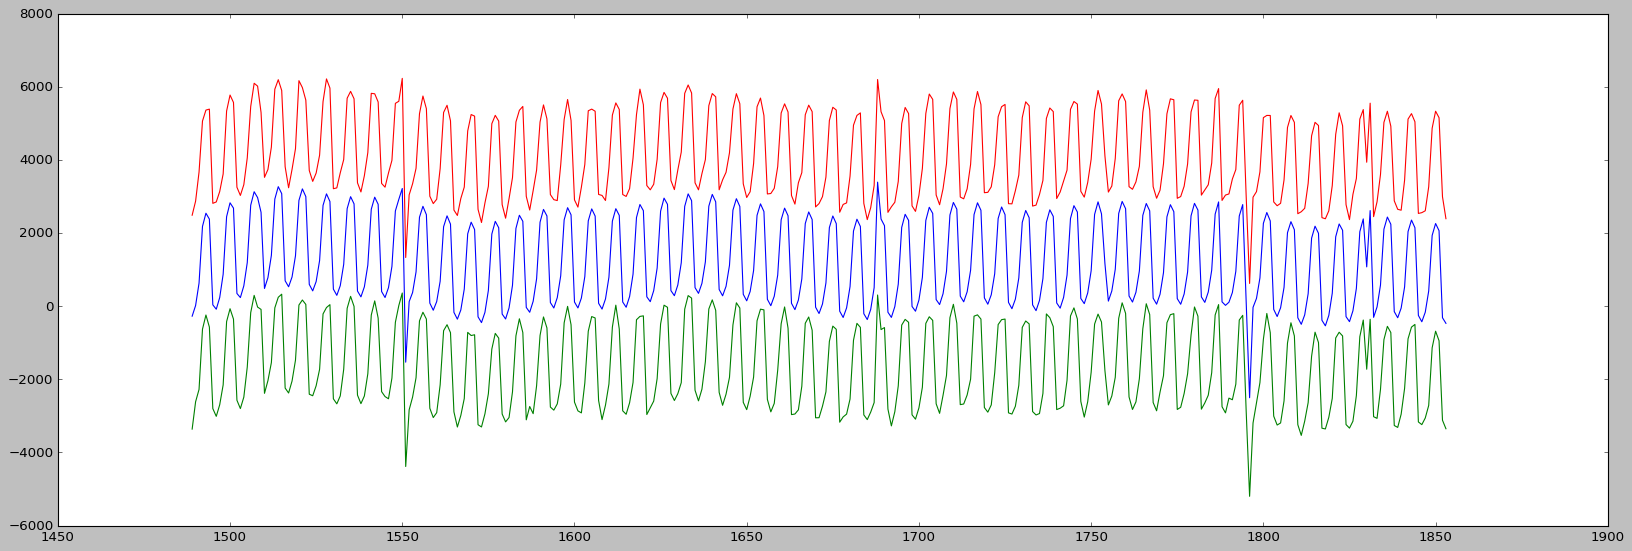

In [112]:
plt.plot(ganancias.yhat)
plt.plot(ganancias.yhat_lower)
plt.plot(ganancias.yhat_upper)

In [113]:
ganancias['upper_coef']=ganancias.yhat_upper/ganancias.yhat
ganancias['lower_coef']=ganancias.yhat_lower/ganancias.yhat

In [114]:
coefs = ganancias.groupby('ds').sum().resample('M').median()[['upper_coef','lower_coef']]

In [115]:
yhat_sum = ganancias.groupby('ds').sum().resample('M').sum()[['yhat']]

In [116]:
yhat_sum['mo_upper'] = yhat_sum.yhat*coefs.upper_coef
yhat_sum['mo_lower'] = yhat_sum.yhat*coefs.lower_coef

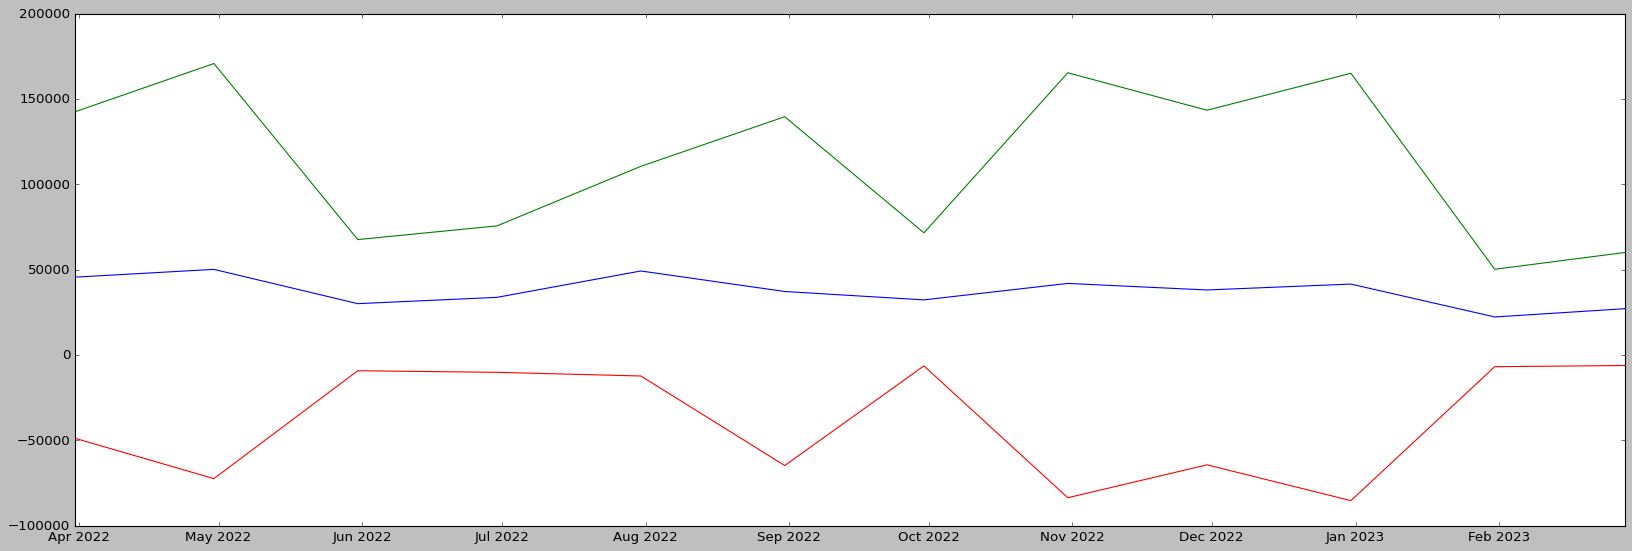

In [117]:
plt.plot(yhat_sum.yhat)
plt.plot(yhat_sum.mo_upper)
plt.plot(yhat_sum.mo_lower)

In [118]:
yhat_sum.reset_index().rename({'ds':'fecha','yhat':'total'},axis=1)

,fecha,total,mo_upper,mo_lower
0,2022-03-31,45539.900729,142375.431673,-48822.831761
1,2022-04-30,50105.872191,170737.537096,-72505.022086
2,2022-05-31,30017.684851,67556.398352,-9284.479073
3,2022-06-30,33715.817388,75596.117087,-10214.741594
4,2022-07-31,49163.319675,110480.639480,-12363.851320
5,2022-08-31,37143.316855,139560.022879,-64829.052559
6,2022-09-30,32234.093053,71527.433729,-6442.097116
7,2022-10-31,41878.247918,165297.430769,-83694.344813
8,2022-11-30,38036.000818,143352.618955,-64428.567471
9,2022-12-31,41492.419538,165011.373331,-85401.137594


In [119]:
mesa_tiempo['mo_upper']= 0
mesa_tiempo['mo_lower']= 0

In [121]:
ganancia_hist = mesa_tiempo.reset_index().copy()

In [126]:
ganancia_hist.total = ganancia_hist.total[:-1]*.763

In [128]:
ganancia_hist = ganancia_hist[:-1]

In [122]:
proyeccion = pd.concat([mesa_tiempo.reset_index(),yhat_sum.reset_index().rename({'ds':'fecha','yhat':'total'},axis=1)])

In [123]:
proyeccion['lower_0']=np.where(proyeccion.mo_lower<=0,0,proyeccion.mo_lower)

In [124]:
proyeccion.to_csv('proyeccion.csv')

In [130]:
proyeccion_corrected = pd.concat([ganancia_hist,yhat_sum.reset_index().rename({'ds':'fecha','yhat':'total'},axis=1)])

In [131]:
proyeccion_corrected['lower_0']=np.where(proyeccion_corrected.mo_lower<=0,0,proyeccion_corrected.mo_lower)

In [134]:
proyeccion_corrected[-12:]

,fecha,total,mo_upper,mo_lower,lower_0
0,2022-03-31,45539.900729,142375.431673,-48822.831761,0.0
1,2022-04-30,50105.872191,170737.537096,-72505.022086,0.0
2,2022-05-31,30017.684851,67556.398352,-9284.479073,0.0
3,2022-06-30,33715.817388,75596.117087,-10214.741594,0.0
4,2022-07-31,49163.319675,110480.639480,-12363.851320,0.0
5,2022-08-31,37143.316855,139560.022879,-64829.052559,0.0
6,2022-09-30,32234.093053,71527.433729,-6442.097116,0.0
7,2022-10-31,41878.247918,165297.430769,-83694.344813,0.0
8,2022-11-30,38036.000818,143352.618955,-64428.567471,0.0
9,2022-12-31,41492.419538,165011.373331,-85401.137594,0.0


In [135]:
proyeccion_corrected.to_csv('proyeccion_corrected.csv')

In [137]:
proyeccion_corrected[-12:].total.sum()

448604.85854906915

In [138]:
proyeccion_corrected

,fecha,total,mo_upper,mo_lower,lower_0
0,2018-02-28,123419.065000,0.000000,0.000000,0.0
1,2018-03-31,160611.500000,0.000000,0.000000,0.0
2,2018-04-30,138232.710000,0.000000,0.000000,0.0
3,2018-05-31,114411.850000,0.000000,0.000000,0.0
4,2018-06-30,119531.580000,0.000000,0.000000,0.0
...,...,...,...,...,...
7,2022-10-31,41878.247918,165297.430769,-83694.344813,0.0
8,2022-11-30,38036.000818,143352.618955,-64428.567471,0.0
9,2022-12-31,41492.419538,165011.373331,-85401.137594,0.0
10,2023-01-31,22217.767776,50150.819743,-6917.179881,0.0


In [142]:
difs = (proyeccion_corrected[-12:].total-36000).to_list()

In [145]:
verde=0
rojo=0
for i in difs:
  if i>=0: verde+= i
  else: rojo += i
print('rojo =',rojo)
print('verde =',verde)

rojo = -34754.2191747088
verde = 51359.077723777904


In [146]:
difs

[9539.900728762434,
 14105.872191450871,
 -5982.315148749836,
 -2284.1826124383006,
 13163.319674973114,
 1143.3168554020885,
 -3765.906946793497,
 5878.2479180005685,
 2036.0008176035626,
 5492.419537585265,
 -13782.232224357278,
 -8939.582242369888]